<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez16_20042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RANDOM FOREST E **FEATURE EXTRACTION**

Finiamo di parlare del random forest e dei tree model con un argomento che si adatta a questi modelli: feature extraction, per capire cosa è importante nella predizione, quali sono le variabili importanti nelle predizioni.

**Utilizzeremo i dati di prezzi di case da comprare a New York.**


Abbiamo parlato di alberi e dei loro pro e contro. Sono molto flessibili nell'ottenre un'accuracty nelle prediciton molto elevata, inoltre possono trattare tipi diversi di variabili, perchè trattano una variabile per volta separando lo spazio con linee parallele agli assi del feature space. 
Un contro può essere è che i single tree possono giungere a risultati diversi ogni volta, soprattuto in presenza di variabili continue. **Per ogni scelta possiamo fare una scelta ottimale localmente, senza poter sapere quali siano le conseguenze per i nodi successivi.**

Ogni volta che faccio un tree model sugli stessi dati posso avere risultati diversi perchè non posso esplorare tutto lo spazio delle feature. La soluzione a questo problema è fare un aggregato di alberi (eseguire copie dello stesso modello più volte): ensemble methods.
La soluzione finale sarà un aggregato delle singole solluzioni.
I due più importanti sono:

- **random forest**, più intuitivo. Il riusltato finale viene estratto in base alla majority vote, nel caso del random forest classifiers. Essendo un valore aggregato posso anche vedere qual'è il mio errore sul risultato, ovvero dare un'interpretazione probabilistica alla classificazione. 

Per il regressor invece il risultato finale si basa su una summary statistics dell'aggregato dei risultati come la mean. 

- **gradient boosted trees**. Gli alberi imarano in maniera sequenziale uno dall'altro, il primo impara dei weight (soluzoine ponderata delle variabili e delle soluzioni) e poi questo viene ottimizzato dagli alberi successivi. Il riusltato finale viene fatto con summary statistic.
Tipicamente questo ha performance migliori del random forest. 

**Quando guardiamo alle feature importance, riesco ad avere delle incertezze per le feature.**

Ciascun albero usa un numero limitato di variabili. 


##**EXTRACTION OF FEATURES**

**Se voglio fare modelli nel campo fisico, scientifico, oltre di capire la predizione bisogna capire quali sono le variabili che rendono il mio modello utile, su cosa si basa la predizione e perchè è una soluzione accurata.**

Infatti posso avere delle variabili che non posso controllare (se ad esempio studio il global warming rispetto all'emissione solare o processi biologici. Non posso controllare questi parametri).

###**QUINDI CAPIRE QUALI SONO LE VARIABILI IMPORTANTI È FONDAMENTALE PER CAPIRE COME RENDONO LA PREDIZIONE POSSIBILE: FEATURE EXTRACTION**

Nei cart, tutto questo è semplice. Torniamo all'esempio del titanic tree. 

**Il gini index è la mia target function che ad ogni nodo massimizzo: scelgo la variabile che mi da il più alto gini index. Siccome ogni varibaile ha un gini index associato,e siccome alcune varibaili vengono usate più votle posso stabilire l'importanza della variabile in base a come il modello funziona.**

(Un altro metodo per feature extraction: Se non posso capire l'importanza (perché ad es vengono fatta delle operazione matematiche), posso rimuovere le variabili una ad una per vedere come cambia la predizione.)

**In generale voglio plottare l'importanza di una variabile in un plot in cui ogni variabile va da 0 a 1 ed ha un'incertezza frequentistica se uso random forest (che è la std dev).**

###In pratica le cose sono più complicate di così, per 2 motivi:

1. Potrei non essere in uno spazio di variabili indipendenti. La classe può diventare degenere. E quindi alcuni alberi scelgono una variabile, altri alberi scegliranno l'altra variabile (degenere) per ottenere uno stesso split con lo stesso gini index, ma con due variabili diverse che sono degeneri. Quindi ho una soppressione dell'importanza della variabile, perchè alcuni alberi scelgono una e altri scelgono l'altra varibaile. 
L'interpretazione delle variabili è un problema associato alla correlazione all'interno delle variabili. 
La correlazione può essere soppressa tramite PCA (principal component analysis) ma così cambio lo spazio in cui sto lavorando e non posso più interpretare le variabili.

Quindi o siamo in uno spazio che non ha covariance, oppure interpretare le varibili in maniera accurata. Un discorso legato a questo è:

2. Encoding of categorical variables.
I modelli basati sugli alberi sono i più semplici per lavorare in feature space che hanno sia valori numerici che categoriche.
Ho 3 tipi di variabili che posso avere:
CATEGORICAL - ORDINAL (NUMERICAL) - CONTINUOS. E posso fare due tipi di encoding diverso:

- **Numerical encoding**. Identifico le specie degli animali con nuemri progressivi in base a come si presentano.

- One-hot encoding. Creo una variabile per ogni classe della variabile categorica, e ogni varibile è binaria e può prendere valori 0 o 1 in base alla categoria. 

Il problema con il nuemerical encoging è che creo una relazione tra le varibili e questo non ha senso. Cioè creo un ordine che non esiste. 

Il problema con il one-hot encoding è che non considero la covarinaza tra le feature e incremento la dimensionalità del feature space perchè introduco delle variabili. Infatti io considero sempre che il feature space sia indipendente, soprattutto nel feature extraction per interpretare le varibili importanti.

**È di gran lunga preferito il one-hot encoding**


#FACCIAMO UN ESERCIZIO

Slide: https://slides.com/federicabianco/mlpns5 

Link per i dati da usare: https://github.com/fedhere/MLPNS2021/tree/main/OHE 




Faremo 2 cose:

- faremo un modello sulla base di dati di case in vendita a new york, e quindi faremo anche mappe con geopandas package.

- random forest and gbt and other model to predct the price of the house, and **how to extract feature importance in case of One Ho t Encoding and in NOT one hot encoding case.**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 15.5MB/s 
     |████████████████████████████████| 15.3MB 276kB/s 
     |████████████████████████████████| 6.5MB 48.7MB/s 


In [ ]:
#per visualizzare i grafici albero installo anche
!brew install graphviz

/bin/bash: brew: command not found


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
import graphviz
import pylab as pl
pl.rcParams["font.size"] = 18
pl.rcParams["figure.figsize"] = (10,10)
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


##reading data

I dati sono ottenuti da una piattaforma chiamata zillow per la vendita di case.

In [ ]:
nychouses = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/allzips.csv ")

In [ ]:
nychouses.head()

,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url
0,263 9th Ave APT 6B,New York,NY,10001,2599988,1536.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
1,15 Hudson Yards # 67E,New York,NY,10001,7575000,2497.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
2,15 Hudson Yards # PH86D,New York,NY,10001,8475000,2515.0,3.0,4.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
3,540 W 28th St PH A,New York,NY,10001,3550000,1755.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...
4,15 Hudson Yards # 34G,New York,NY,10001,4420000,1460.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...


Devo pulire i dati togliendo ad esempio URL, City (perchè è sempre NY), Days on zillow, lo stato, address, ecc.

Voglio tenere solo la zona (ZIP CODE), sales type, numero bagni, square footage, **price (target variable)**. 

Uso wget per prendere dal web delle cose e **lo uso da solo nella cella**, per selezionare solo NYC zip_code from zillow file. Sto prendendo il file zip_code.zip dalla repo della prof. ZIP_CODE sarebbe il codice postale.   

In [ ]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true 

--2021-05-05 08:55:51--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip [following]
--2021-05-05 08:55:51--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip [following]
--2021-05-05 08:55:52--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [ ]:
!unzip ZIP_CODE_040114.zip?raw=true 

Archive:  ZIP_CODE_040114.zip?raw=true
replace ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
zips = gpd.read_file("ZIP_CODE_040114.shp") 

Lo ZIP_CODE è uno **shape file, che contiene informazioni sulle coordinate** (anche in planetary astronomer, geologist, ...).

Contengono diversi tipi di informaizone, necessari per leggere il file. Infatti con geopandas leggo shape file, ma questo non può funzionare se non ci sono gli altri file che ho scaicato insieme che sono meta data utili per leggere lo shape file. 

**Leggendo lo shape file con geopandas, viene memorizzato come un dataframe, con variabili sulle colonne e osservazioni sulle righe.**

In [ ]:
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Questo tipo di dataframe però, ha una proprietà che non ho visto prima nei dataframe: è "geometry", contenuto nel pacchetto fiona di geopandas. Geometry is a shape variable: polygon, point, line..

**Geopandas can do operation with this shape.**

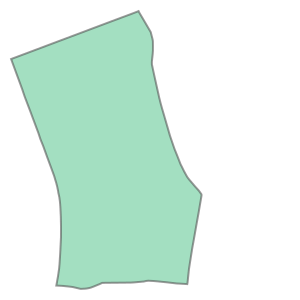

In [ ]:
zips.loc[0, "geometry"]

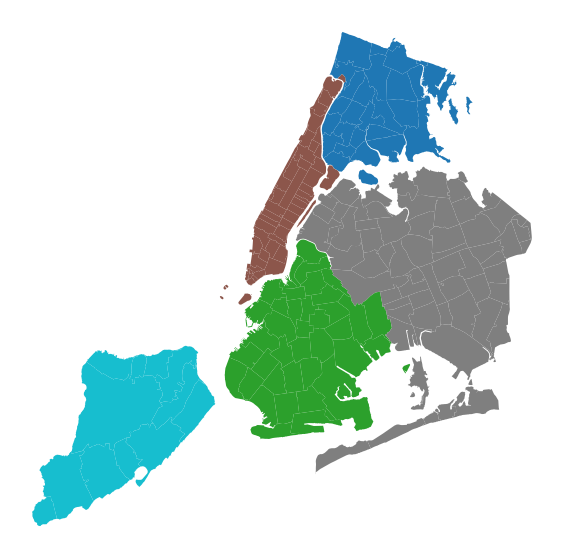

In [ ]:
ax = zips.plot(column="COUNTY", figsize=(10,10))
ax.axis('off'); 

#column="COUNTY" is needed to get colors

I can call by the popular name **"PO_NAME"**


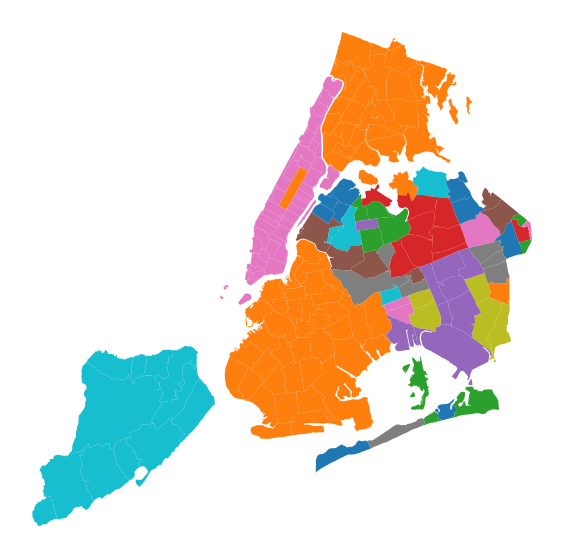

In [ ]:
ax = zips.plot(column="PO_NAME", figsize=(10,10))
ax.axis('off'); 

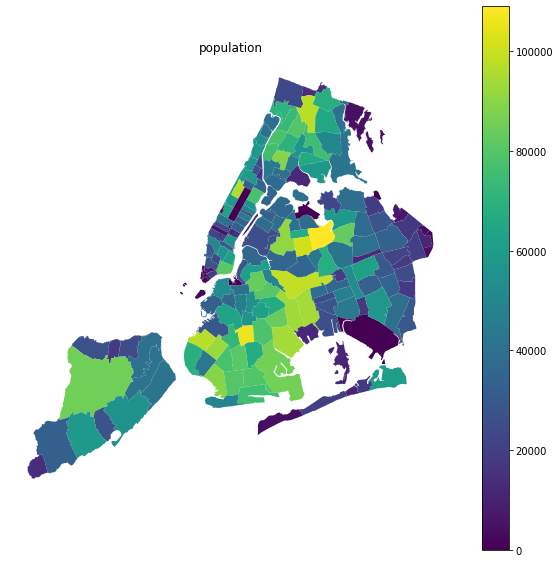

In [ ]:
ax = zips.plot(column="POPULATION", figsize=(10,10), legend=True)
ax.set_title("population")
ax.axis('off');

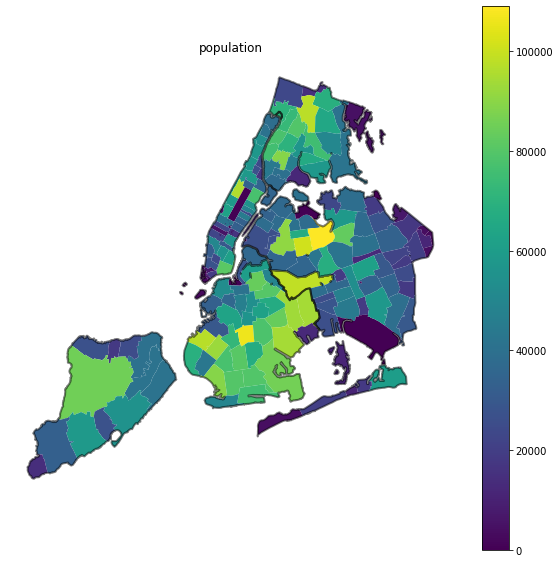

In [ ]:
ax = zips.plot(column="POPULATION", figsize=(10,10), legend=True)
#counties = 
zips.dissolve(by="COUNTY").plot(lw=2, edgecolor="k", alpha=0.5, facecolor="none", ax=ax)
ax.set_title("population")
ax.axis('off');

Posso anche mettere insieme ad esempio il dataframe in base ai quartieri. Come segue: ottengo una osservazione per ogni quartiere e riguardo alle altre variabili non sappiamo come sono state realizzate (alcune sommate, altre hanno preso solo la prima che compariva, ...)

In [ ]:
zips.dissolve(by="COUNTY")

,geometry,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
COUNTY,,,,,,,,,,,,
Bronx,"MULTIPOLYGON (((1013982.340 228008.359, 101397...",10471,0,Bronx,23477.0,8.965141e+07,NY,36,005,http://www.usps.com/,0.0,0.0
Kings,"MULTIPOLYGON (((995654.726 148395.272, 995672....",11213,0,Brooklyn,62426.0,2.963100e+07,NY,36,047,http://www.usps.com/,0.0,0.0
New York,"MULTIPOLYGON (((982643.204 195836.782, 982643....",10463,0,Bronx,70641.0,3.119702e+06,NY,36,061,http://www.usps.com/,0.0,0.0
Queens,"MULTIPOLYGON (((1017737.930 143982.218, 101772...",11436,0,Jamaica,18681.0,2.269930e+07,NY,36,081,http://www.usps.com/,0.0,0.0
Richmond,"POLYGON ((914830.906 127205.951, 914831.917 12...",10301,0,Staten Island,40438.0,1.051827e+08,NY,36,085,http://www.usps.com/,0.0,0.0


Prendiamo altri shape file:

In [ ]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true 

--2021-05-05 09:50:08--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-05-05 09:50:08--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-05-05 09:50:08--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
!wget https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson 

--2021-05-05 09:50:08--  https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson
Resolving opendata.arcgis.com (opendata.arcgis.com)... 3.225.243.7, 54.174.159.69, 3.214.85.175, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|3.225.243.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson.2’

e68ceb0a193e4e378b2     [       <=>          ] 206.47M  33.9MB/s    in 5.4s    

2021-05-05 09:50:14 (38.4 MB/s) - ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson.2’ saved [216502798]



In [ ]:
italy = gpd.GeoDataFrame.from_file("e68ceb0a193e4e378b29255b62ab75e0_0.geojson") 

In [ ]:
!unzip 'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true' 

Archive:  CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
replace CEDIT_6_5_Friuli_Italy_1976.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
eq = gpd.read_file("CEDIT_6_5_Friuli_Italy_1976.shp")
eq.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
I can ovelap two maps:

SyntaxError: ignored

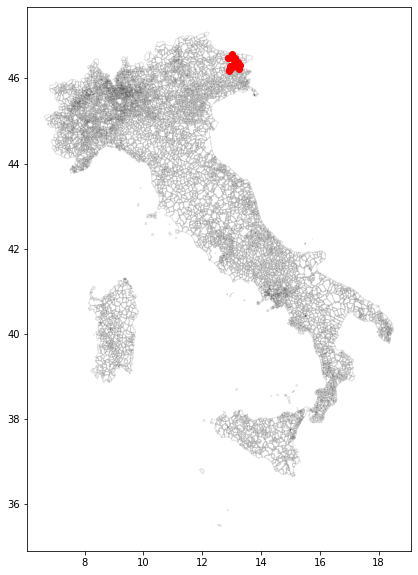

In [ ]:
ax = italy.to_crs(epsg=4326).plot(facecolor="none", edgecolor="k", 
figsize=(10,10), alpha=0.1)
eq.plot(color="r", ax=ax) 

**I can see the coordiante system:**

In [ ]:
italy.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
italy.to_crs(epsg=4326)

,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,1,1,1,201,201,1042,001042,Burolo,,0,13222.896787,{428A5371-1203-4014-9D3B-D6F2353A226F},0.141254,5.475974e+06,"MULTIPOLYGON (((7.93812 45.49086, 7.93818 45.4..."
1,2,1,1,1,201,201,1060,001060,Casalborgone,,0,24056.822202,{7772511B-1529-4A71-8ED1-7880DC64354A},0.270078,2.012501e+07,"MULTIPOLYGON (((7.91362 45.15298, 7.91369 45.1..."
2,3,1,1,1,201,201,1076,001076,Chianocco,,0,21411.076163,{0F2EE4C5-219C-43DD-AD6E-D8AE5E9F5F7B},0.225795,1.861335e+07,"MULTIPOLYGON (((7.18303 45.19351, 7.18342 45.1..."
3,4,1,1,1,201,201,1077,001077,Chiaverano,,0,18164.369945,{16E8325A-C7CD-4B85-AB7D-74216B9D06B3},0.196687,1.202212e+07,"MULTIPOLYGON (((7.90330 45.52628, 7.90360 45.5..."
4,5,1,1,1,201,201,1079,001079,Chiesanuova,,0,10777.398475,{8FF28D8A-C5F5-4214-AFA0-999D470CF9C8},0.116011,4.118911e+06,"MULTIPOLYGON (((7.65285 45.42981, 7.65407 45.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921,7922,5,20,90,0,90,90055,090055,Pattada,,0,68982.842121,{899F5A3D-A8EA-4F00-B074-2043ECD71C5D},0.714765,1.648777e+08,"MULTIPOLYGON (((9.06375 40.67057, 9.06431 40.6..."
7922,7923,5,20,111,0,111,111009,111009,Carbonia,,1,67399.354027,{A5D0EB0D-12E5-4713-8959-60CA7F1C23AA},0.698552,1.455415e+08,"MULTIPOLYGON (((8.55251 39.27980, 8.55310 39.2..."
7923,7924,5,20,91,0,91,91039,091039,Loceri,,0,36459.248203,{87048657-CFAF-4D2D-9D07-910B41B00860},0.383662,1.937352e+07,"MULTIPOLYGON (((9.59146 39.87038, 9.59162 39.8..."
7924,7925,5,20,95,0,95,95083,095083,Magomadas,,0,21155.248455,{A59554E8-69CB-4738-9BB1-8866B97B3B76},0.226034,9.019823e+06,"MULTIPOLYGON (((8.48814 40.27146, 8.48851 40.2..."


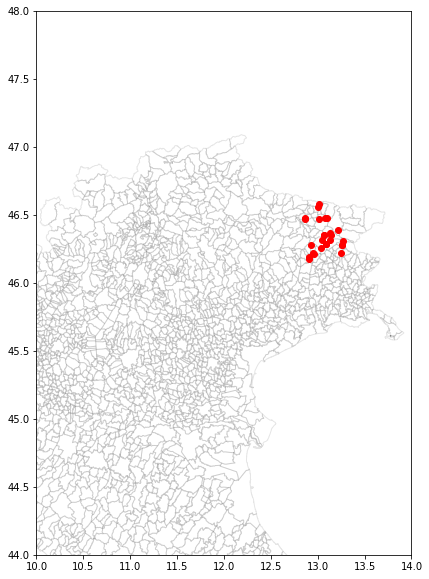

In [ ]:
ax = italy.to_crs(epsg=4326).plot(facecolor="none", edgecolor="k", 
                                  figsize=(10,10), alpha=0.1)
eq = gpd.read_file("CEDIT_6_5_Friuli_Italy_1976.shp")
eq.plot(color="r", ax=ax)
ax.set_xlim(10,14)
ax.set_ylim(44,48);

Lascaimo un po' geopandas e torniamo ai nostri dati di new york

## data preprocessing

I hate to manipulate data and clean the data

In [ ]:
nychouses["price"]

0       2599988
1       7575000
2       8475000
3       3550000
4       4420000
         ...   
3720    3700000
3721     475000
3722     625000
3723     675000
3724    7575000
Name: price, Length: 3725, dtype: object

nychouses["price"] is a dtype: object, i.e. a tring. SO I have to change this series into numeric variable. errors='coerce' force to convert a non numerical variable, for example if there are some NaN. 

In [ ]:
nychouses["price"] = pd.to_numeric(nychouses.price, errors="coerce")
nychouses["price"].dtype

dtype('float64')

I will merge my zip_code with zillow data, because I wanna plot.

The pandas command zips.merge retutn a geodataframe because zips is a geodata frame. If I do the reverse: nychouses.merge pandas will return a dataframe because nychoses is a dataframe. This work with all pandas command.

tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean() 

gives me the average price of hoses grouped by zipcode.
So tmp_[["ZIPCODE", "price"]] is a dataframe containing only price and ZIPcode

reset_index()

reset the index otherwise the index will be one of the zipcode, for the firste lne of code.

In [ ]:
tmp_ = zips.merge(nychouses, right_on="zip", left_on="ZIPCODE").reset_index()
tmp_.merge(tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean().reset_index(
), on="ZIPCODE") 

,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address,city,state,zip,price_x,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url,price_y
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11756 140th St,Jamaica,NY,11436,529999.0,1240.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.299990e+05
1,1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11756 140th St,Jamaica,NY,11436,529999.0,1240.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.299990e+05
2,2,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",1793 Riverside Dr APT 3I,New York,NY,10034,619000.0,900.0,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
3,3,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",24 Cooper St APT 4E,New York,NY,10034,225000.0,NaN,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
4,4,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",24 Cooper St APT 1C,New York,NY,10034,155000.0,NaN,1.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1528,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",350 W 42nd St # 5LL,New York,NY,10036,1275000.0,957.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1529,1529,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",434 W 47th St APT 4W,New York,NY,10036,785000.0,950.0,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1530,1530,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",646 9th Ave APT 2FS,New York,NY,10036,449000.0,510.0,0,10.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1531,1531,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",635 W 42nd St APT 27K,New York,NY,10036,50000000.0,12500.0,10.0,10.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06


I can plot, and I see how the price changes based on the ZIPcode.

This is a bad map: I only have data only in restricted area. Everythings that cannot take the avrage of the price, gets lost.

There are also outliers. 


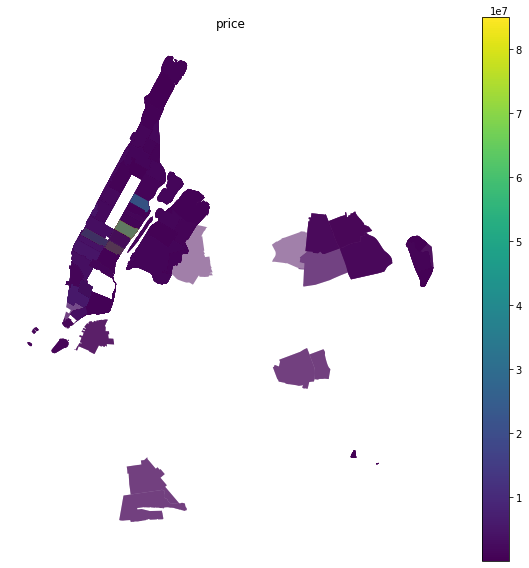

In [ ]:
ax = tmp_.merge(tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean().reset_index(
    ), on="ZIPCODE").plot(column="price_x", alpha=0.5, figsize=(10,10), legend=True)
ax.set_title("price")
ax.axis('off');

I can look also the ZIPCODE as numerical varible. I am gonna use OHE and numerical encoding of zipcode. 

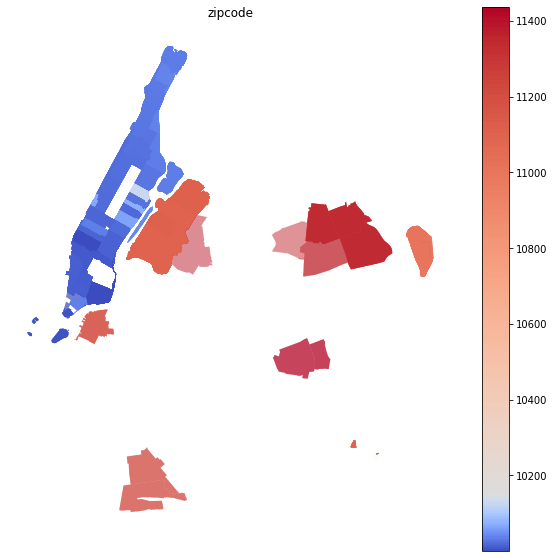

In [ ]:
import matplotlib.colors as colors
tmp_["ZIPCODE"] = tmp_["ZIPCODE"].astype(int)
ax = tmp_.plot(column="ZIPCODE", alpha=0.5, figsize=(10,10), legend=True,
               cmap="coolwarm",  norm=matplotlib.colors.TwoSlopeNorm(
                   10150,
                   tmp_["ZIPCODE"].min(), tmp_["ZIPCODE"].max()))
ax.set_title("zipcode")
ax.axis('off');

ZIP code has some structure, has an order even if that is not a stict order and shold be interpreted as a category. 


Next analysis is based on number of bathroom, sqft and zipcode in 2 ways:

1. pretend zipcode is a number, and let gbt or rf running with zipcode as a number.

2. Use OHE to create a variable for each ZIPCODE. All those varable has 1 ony in one zipcode, and zero everywhere.

Notebook: https://github.com/fedhere/MLPNS2021/blob/main/OHE/locationLocationLocation.ipynb


**When I run rf regression (I wanna predict the price of the house, that is continuos variable), before I do that I am gonna create a categorical varibale that plit the price into chunks: price over or below 1 million dollar.**

##**IF I CANNOT SOLVE THIS PROBLEM WITH RF OF GBT CLASSIFIERS I HAVE NO CHANCE TO SOLVE THE REGRESSION PROBLEM, because I have not enough informaton to do the regression**



By not whitening the data to show the split in graph. I will normally scale it, because I have variable of order 1 and other of order 10^7.


La prof ha fatto tree model con numerical encoding e con OHE. In entrambi i casi il primo split è fatto sui sqft. 

Con questo dataset, fatto sia con i gbt che con rf (classifier), ottengo accuracy of gbt=0.96 e 97% per onguna delle due codifiche e 100% per rf per tutte e due le encoding, ovvero non importa che encoding faccio, l'accuracy non cambia. (In genere invece, è il gbt che da risultati migliori).

**I can also built a roc curve, because of the probabilistic result. Infact, I have a bunch of trees in the forest and each trees meakes its own decision and I interpret the variance aroud the aggregate decision as the probability**.

##TO FIND THE IMPORTANCE OF THE FEATURE OF THE MODEL I CAN RUN rf.feature_importance AS A PROPERTIES OF THE MODEL AFETR FITTING.

But feature importance become meaningless in the case of rf with OHE because he gives me the importance also of the ZIPcode. And my model doesn't know that this number are ZIP code and they are related.

Use the code to make feature improtance whenever I need, and save it as a reference. 

**Note that** the OHE gives me that the ZIPcode variable are not so important. BUT THIS IS A LIE, BECAUSE LOCATION OF HOUSE IS IMPORTANT FOR THE PRICE. 

So, the intepretation of the feature importance has been corrupted by the wway in which I encoded the variable. 

**FOR THE GBT I CANNOT GIVE THE UNCERTANTIES LIKE IN THE RF AS THE VARIANCE OF THE AGGREGATE RESULTS, BECAUSE IN GBT I AM USING WEIGHTS. AND THE ONLY WAY TO HAVE UNCERANTIES IS TO DO BOOTSTRAPPING.** 

IN GBT THE FEATURE IMPORTANCE BY THE WAY IS MUCH DEEPER THAN THE RF, BACAUSE IN GBT I USE THE WIEGHTS AND I AUTOMATICALLY GIVE IMPORTANCE TO THE VARIABLE.

#VISUALIZATION

https://slides.com/federicabianco/mlpns6 

Just for fun, look: sonification wanda diaz merced

I need to represent the data because it is more clear what's going on, insted fo just number. I can have some different stes of data with same statistical properties, but they are different, and I only know this by visualization. (See one of the first slides)

Common problem of visualization:

- too many points!

- too many dimension


The point is to make a plot that contain a lot of information, but still remain intuitive.

BAD VISUALIZATION:

- **AMBIGUOS** (ad esempio insieme di plot con una scala diversa). 


- **DISTORTED** (=misleading) (truncated graph, o distorsione per la visualizzazione di un oggetto 3D come la terra, che in questo caso è inevitabile). 

Oppure la duplicazione dei dati per mostrare un periodo dell'orbita di un pianeta è un'ambiguità e distorsione. Tuttavia questo è comunque uno standard in questo tipo di paper.

- **DISTRACTING** comune in infographic o data journalism. Ma anche in data science perchè avendo molti dati diventa difficle comunicare i dati. 

or a combination of the above.

**exogenous variable** = variable whose value is determined outside the model and is imposed on the model, (i.e. the independent variable x)

**endogenous variable** = variable determined by the model (i.e. the dependent variable y )